---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 5

---

Please write your full name here
- **Name** : Mohamed Elsayed Eid

In [205]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [206]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

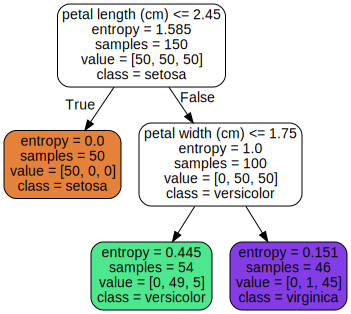

In [207]:
# Answer:
from graphviz import Source
from sklearn.tree import export_graphviz

def export_tree_plotting(tree_clf, filename="clf_tree.dot", feature_names=None, class_names=None, rounded=True, filled=True):
    """
    Export decision tree visualization to a .dot file and display using Graphviz.
    """
    export_graphviz(tree_clf, out_file=filename,
                    feature_names=feature_names,
                    class_names=class_names,
                    rounded=rounded,
                    filled=filled)

    with open(filename) as file_read:
        dot_graph = file_read.read()

    return dot_graph


dot_graph = export_tree_plotting(tree_clf, filename="clf_tree.dot", feature_names=iris.feature_names[2:], class_names=iris.target_names)
Source(dot_graph)

## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [208]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=True, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

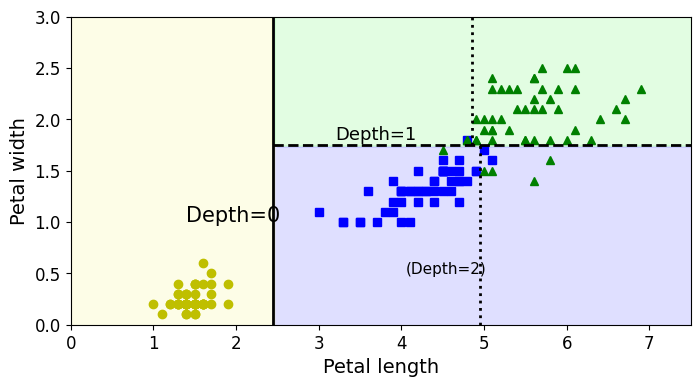

In [209]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y, legend=False)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

1.
  
  * in root block, entropy = 1.585 which indicated impurity and uncertainty.
  * in left block `true` entropy = 0, in right block `false` entropy = 1
  * in case of entropy = 0, the block is pure set (one class only), when entropy = 1, the block is impure set (equally likely classes)

2. from plot, the more we incraese the max_depth, the more the tree will grow and be more complex, but also it is more prone to overfitting.

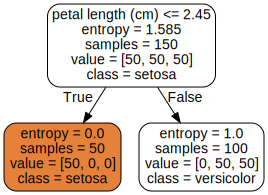

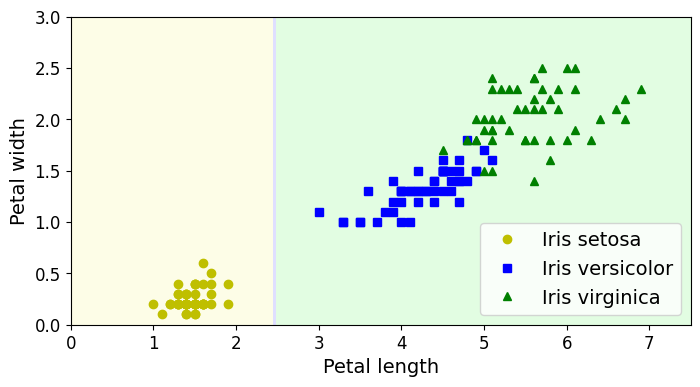

In [210]:
####### YOUR CODE HERE

# Train the decision tree using a maximum depth of 1
clf_tree = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
clf_tree.fit(X, y)

dot_graph = export_tree_plotting(clf_tree, filename="clf_tree2.dot", feature_names=iris.feature_names[2:], class_names=iris.target_names)
display(Source(dot_graph))

plt.figure(figsize=(8, 4))
plot_decision_boundary(clf_tree, X, y)

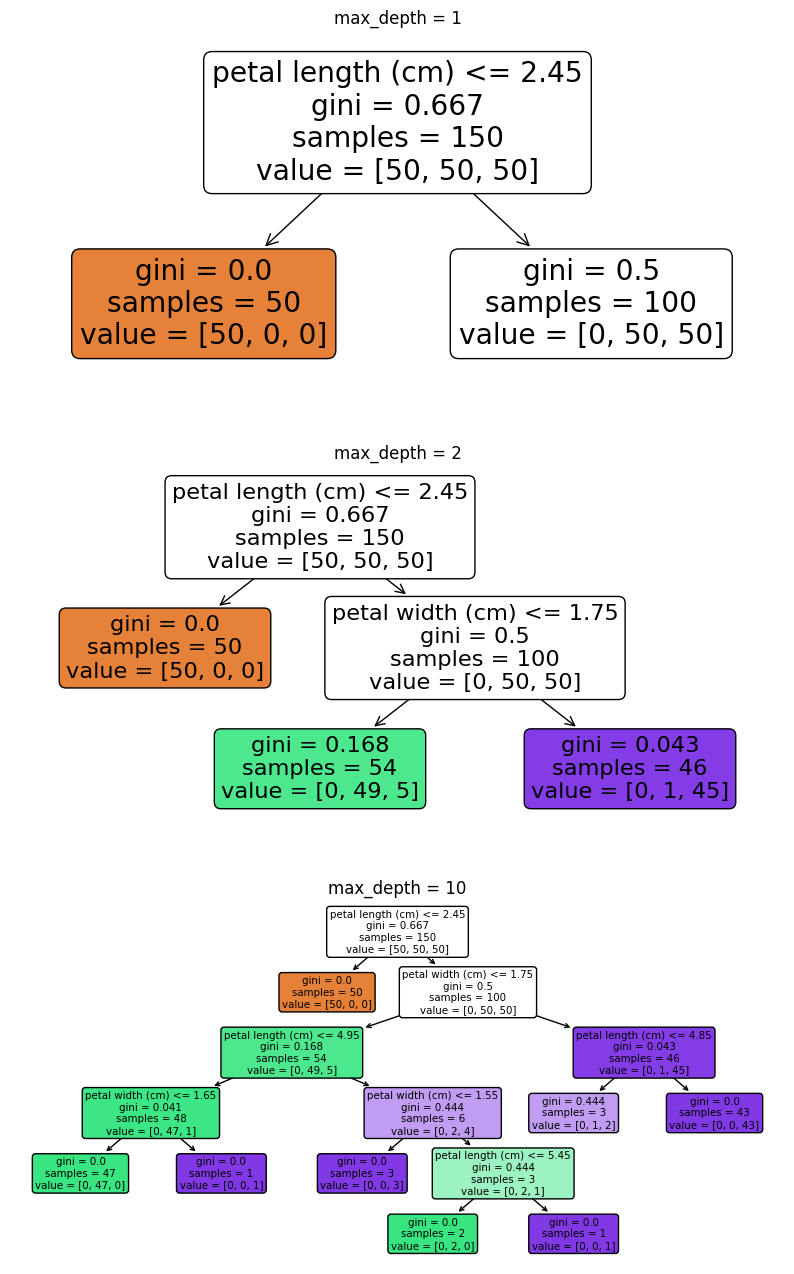

In [211]:
from sklearn.tree import plot_tree

# Create and fit the decision tree classifiers
tree_clf_1 = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_clf_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_10 = DecisionTreeClassifier(max_depth=10, random_state=42)

tree_clf_1.fit(X, y)
tree_clf_2.fit(X, y)
tree_clf_10.fit(X, y)

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 16))

plot_tree(tree_clf_1, ax=axes[0], feature_names=iris.feature_names[2:], filled=True, rounded=True)
axes[0].set_title('max_depth = 1')

plot_tree(tree_clf_2, ax=axes[1], feature_names=iris.feature_names[2:], filled=True, rounded=True)
axes[1].set_title('max_depth = 2')

plot_tree(tree_clf_10, ax=axes[2], feature_names=iris.feature_names[2:], filled=True, rounded=True)
axes[2].set_title('max_depth = 10')

plt.show()

### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1.

In [212]:
######### Your code for (2.)

sample_X = [[5, 1.5]]

# Get the leaf node index
leaf_index = tree_clf_2.apply(sample_X)[0]

# Get the count of samples in the leaf node for each class
class_counts = tree_clf_2.tree_.value[leaf_index].flatten()

# Calculate the total count of samples
total_count = np.sum(class_counts)

# Calculate probabilities for each class
class_probabilities = class_counts / total_count

print("manual probabilities:")
for class_idx, class_name in enumerate(iris.target_names):
    print(f"Class '{class_name}': {class_probabilities[class_idx]:.4f}")

predict_proba_result = tree_clf_2.predict_proba(sample_X)[0]
print("\nProbabilities from predict_proba:")
for class_idx, class_name in enumerate(iris.target_names):
    print(f"Class '{class_name}': {predict_proba_result[class_idx]:.4f}")


manual probabilities:
Class 'setosa': 0.0000
Class 'versicolor': 0.9074
Class 'virginica': 0.0926

Probabilities from predict_proba:
Class 'setosa': 0.0000
Class 'versicolor': 0.9074
Class 'virginica': 0.0926


## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

Score: 96.0


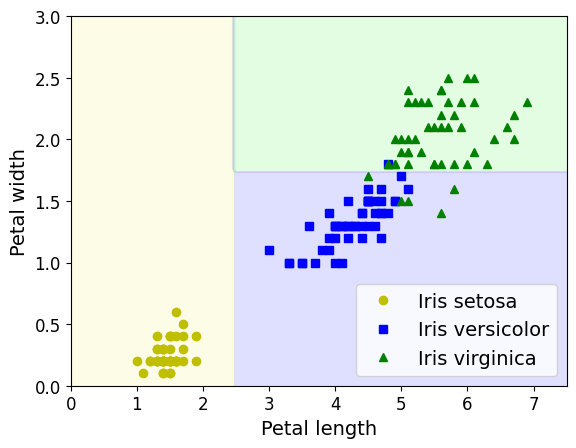

In [236]:
##### YOUR CODE HERE
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target


tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

# Plot decision boundary
plot_decision_boundary(tree_clf, X, y)

score = tree_clf.score(X, y)
print(f"Score: {score * 100}")


The following cell rotates the data by angle **30**

In [237]:
angle = np.pi / 180 * 30
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

Score: 97.33%


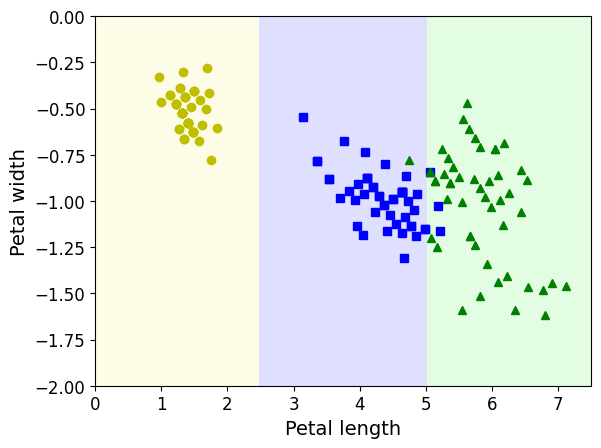

In [243]:
##### YOUR CODE HERE
tree_clf_r = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_r.fit(Xr, y)

# Plot decision boundary
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0, 7.5, -2, 0], legend=False)

score = tree_clf_r.score(Xr, y)
print(f"Score: {score * 100:.2f}%")

### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [216]:
import numpy as np
def plot_logistic_regression(clf, X, y, axes, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

logistic Score: 0.9667


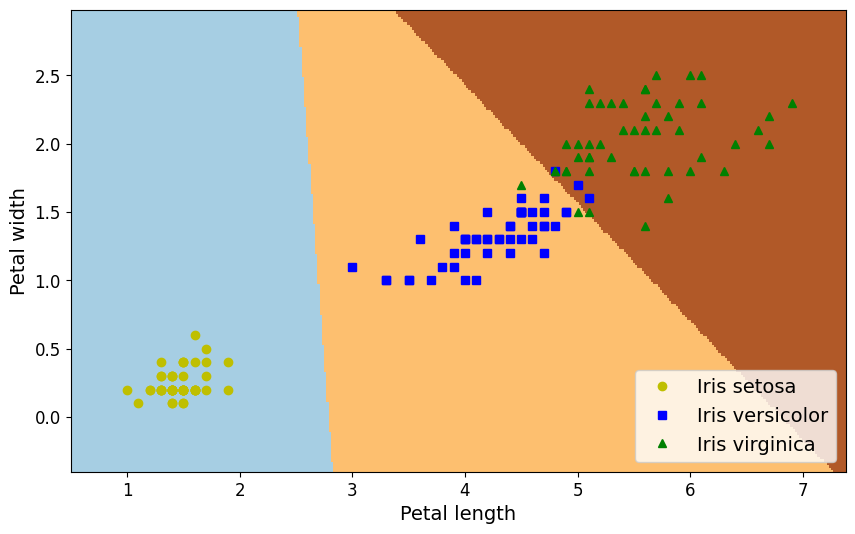

In [217]:
##### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X, y)

score = logistic_model.score(X, y)
print("logistic Score: {:.4f}".format(score))

plt.figure(figsize=(10, 6))
axes =  plt.subplot(1, 1, 1)
plot_logistic_regression(logistic_model, X, y, axes)

**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

logistic Score: 0.9667


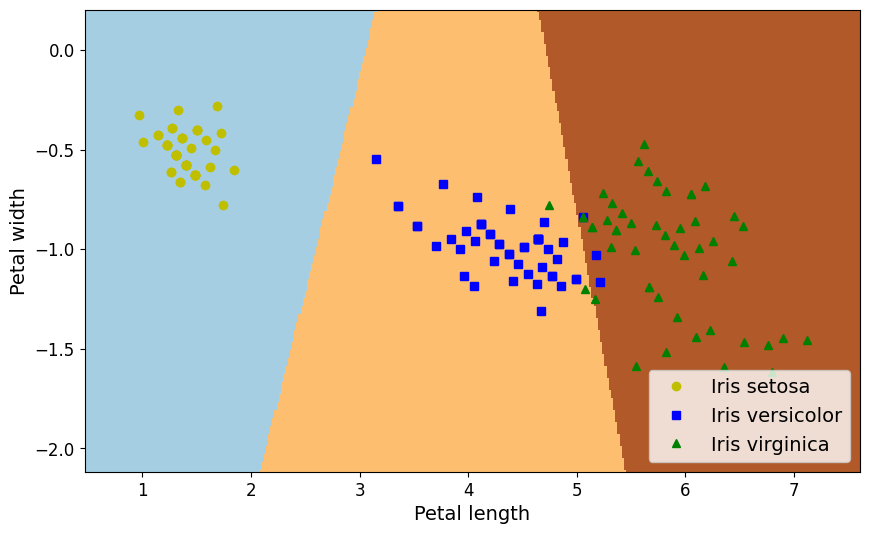

In [218]:
###### YOUR CODE HERE
logistic_model_r = LogisticRegression(max_iter=1000, random_state=42)
logistic_model_r.fit(Xr, y)

score = logistic_model_r.score(Xr, y)
print("logistic Score: {:.4f}".format(score))

plt.figure(figsize=(10, 6))
axes =  plt.subplot(1, 1, 1)
plot_logistic_regression(logistic_model_r, Xr, y, axes)

### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1.
  * $\text {Logistic Regression}$: both models of original data and rotated data have the same scores.

  * $\text {Decision Tree}$: models of original data and rotated data have defferent scores, higher in case of original data.

2. These results may be due to:
  * Logistic regression is a linear classifier that aims to find the best linear decision boundary to separate classes. It's less affected by rotations of the dataset. On the other hand, decision trees are non-linear models that can capture complex relationships between features. They may be more sensitive to changes in the distribution of the data.

  * Decision trees can create more flexible decision boundaries, which can adapt to the shape and orientation of the dataset. If the dataset is rotated, the decision boundary of the decision tree may change significantly, affecting its performance.

## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.35)`.

In [219]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=10000, noise=0.35, random_state=42)
print(X_moons.shape, y_moons.shape)

(10000, 2) (10000,)


2. Split it into a training set and a test set using train_test_split().

In [220]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier.
    - Choose reasonable values for each hyperparameter.

In [221]:
# Define parameter grid for grid search
param_grid = {
    'max_depth': [2, 3, 5, 7, 10],
    'max_leaf_nodes': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

tree_clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 7, 'max_leaf_nodes': 15, 'min_samples_split': 2}


4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [222]:
best_params = grid_search.best_params_
tree_clf = DecisionTreeClassifier(**best_params, random_state=42)
tree_clf.fit(X_train, y_train)
print("Test Score: {:.4f}".format(tree_clf.score(X_test, y_test)))

Test Score: 0.8930


## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. Decision Tree with max_depth = 2 has fewer splits, and the resulting decision boundaries are straighter. Decision Tree with max_depth = 5, is a more complex model. It has more splits, and the resulting decision boundaries are more wiggly.

2. Decision Tree with max_depth = 5 `The more complex model`, has higher variance error. This is because the more we increase the depth of the tree, the more sensitive it is to changes in the training data and more prone to overfitting.

3. Decision Tree with max_depth = 2 `The simpler model`, has higher bias error. This is because it underfits the training data. It does not capture the complexity of the relationship between the features and the target variable.

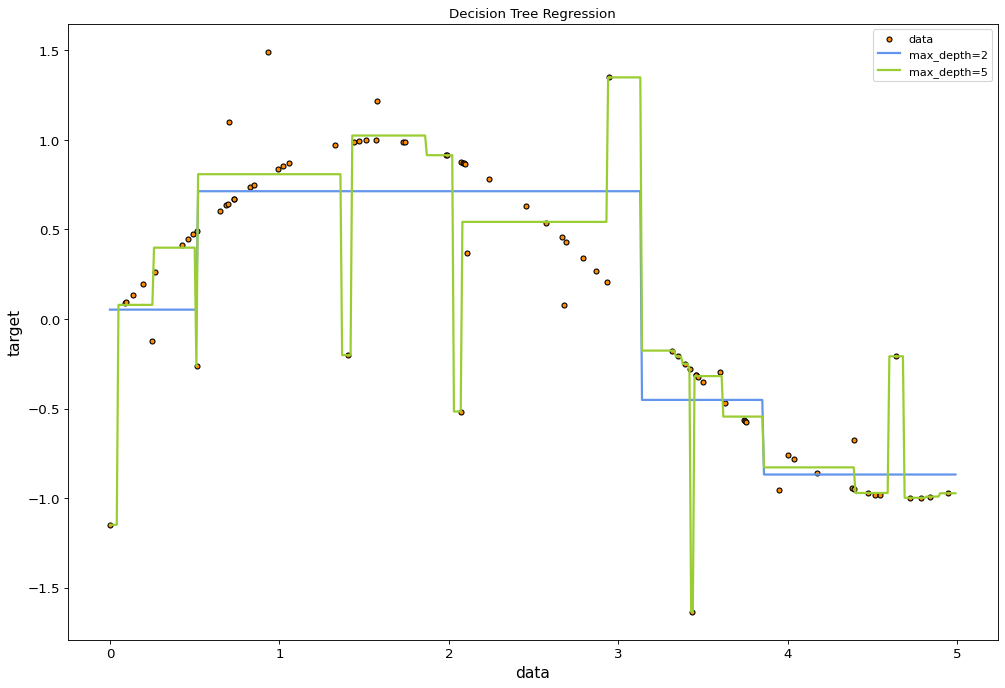

In [223]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()